In [1]:
import sys
sys.path.append('../')

from src import *

# Iris Analysis

In [40]:
df = load_data('../data/processed/processed_iris.csv')

Data loaded successfully.


In [41]:
X = df.drop(columns=['Id', 'Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = split_data(X, y)

Data split successfully.


In [42]:
X_train = data_normalize(X_train, method='minmax')

Data normalized successfully.


In [43]:
X_test = data_normalize(X_test, method='minmax')

Data normalized successfully.


In [44]:
input_shape = X_train.shape[1]
latent_dim = 2
topology = [16, 8, 4]

In [45]:
encoder = build_encoder(latent_dim, input_shape, topology)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input_layer │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 16)        │         80 │ encoder_input_la… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 8)         │        136 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 4)         │         36 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean_layer        │ (None, 2)         │         10 │ dense_14[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var_layer     │ (None, 2)         │         10 │ dense_14[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_2          │ (None, 2)         │          0 │ z_mean_layer[0][… │
│ (Sampling)          │                   │            │ z_log_var_layer[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 272 (1.06 KB)

 Trainable params: 272 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
decoder = build_decoder(latent_dim, input_shape, topology)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input_layer             │ (None, 2)              │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_outputs (Dense)         │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264 (1.03 KB)

 Trainable params: 264 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
vae = VAE(encoder, decoder, beta=0.1)

In [48]:
optimizer = optimizer_adam(lr=0.0003)
vae.compile(optimizer=optimizer)

Successfuly created optimizer: Adam with learning rate 0.0003


In [49]:
model_checkpoint = model_checkpoint_callback("./checkpoint.keras")

Model checkpoint callback created.


In [50]:
loss_tracker = LossTracker()

In [51]:
vae.fit(
    X_train, 
    epochs=100, 
    batch_size=8, 
    validation_data=(X_test, None), 
    callbacks=[model_checkpoint, loss_tracker]
)

Epoch 1/100
13/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 0.0090 - reconstruction_loss: 4.8691 - total_loss: 4.8700Epoch 1, Loss: 4.7096
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - kl_loss: 0.0092 - reconstruction_loss: 4.8374 - total_loss: 4.8383 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - kl_loss: 0.0088 - reconstruction_loss: 4.1920 - total_loss: 4.1929Epoch 2, Loss: 4.1862
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - kl_loss: 0.0109 - reconstruction_loss: 4.3206 - total_loss: 4.3217 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - kl_loss: 0.0126 - reconstruction_loss: 5.0077 - total_loss: 5.0089Epoch 3, Loss: 4.0445
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - kl_loss: 0.0107 - reconstruction_loss: 4.1970 - total_loss: 4.1980 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+0

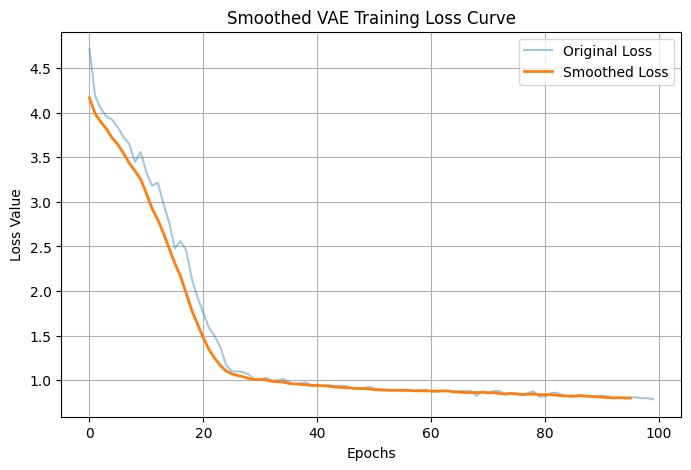

In [52]:
plot_loss(loss_tracker)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


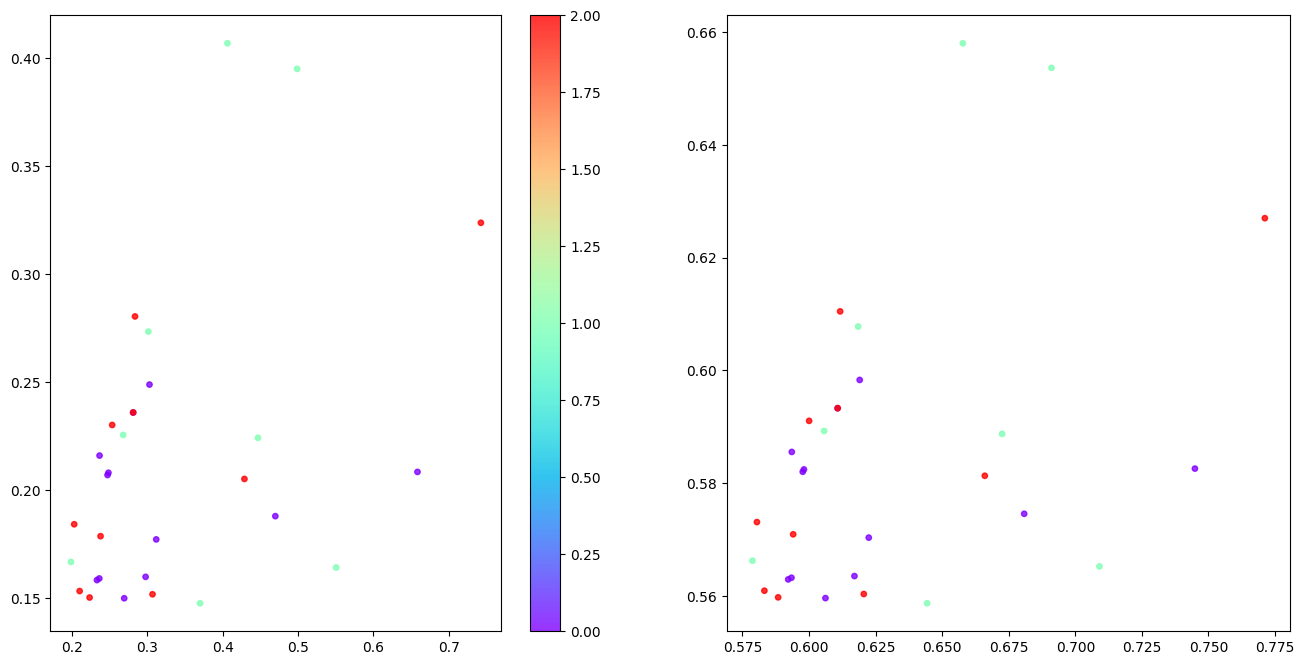

In [53]:
plot_latent_space(vae, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


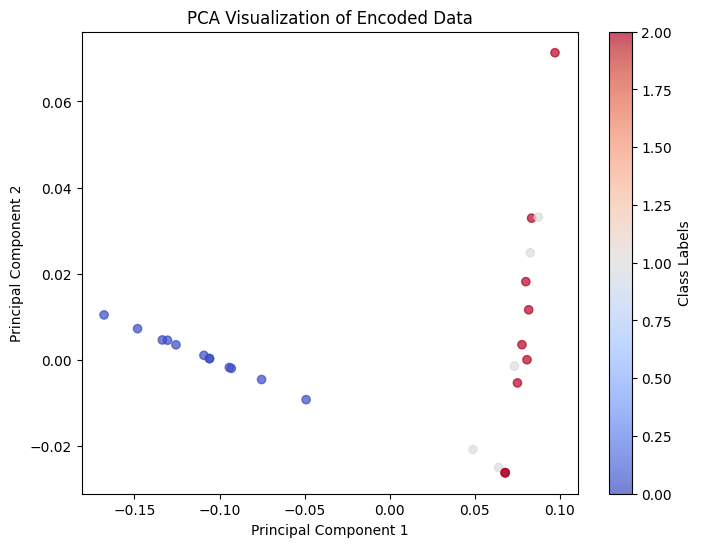

Explained variance ratio: [0.9496327  0.05036729]


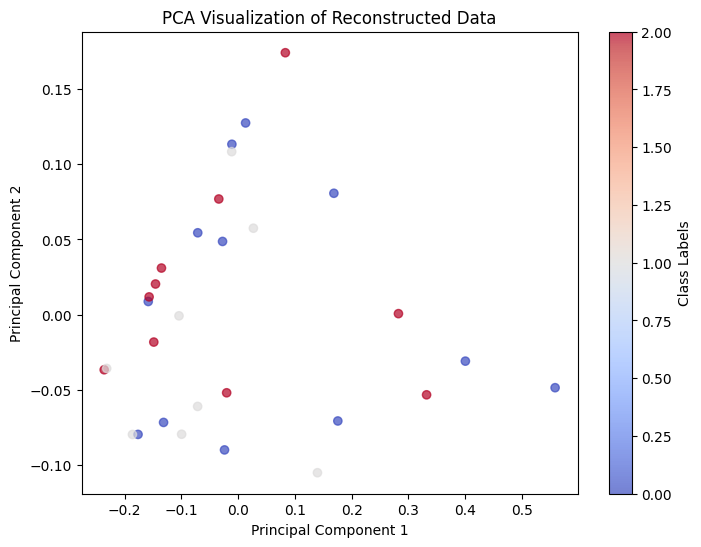

Explained variance ratio: [0.8434914  0.12218951]


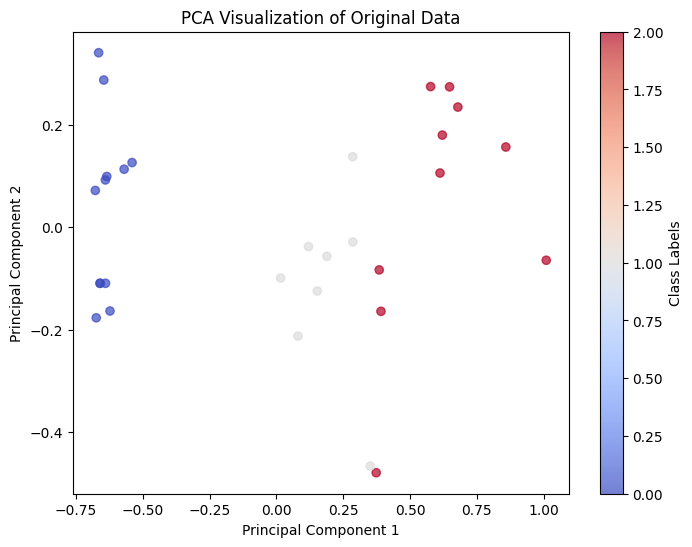

Explained variance ratio: [0.8531231 0.1086995]


In [54]:
z_mean, z_log_var, reconstructions, labels = predict(vae, X_test, y_test)
plot_reduced_pca(z_mean, labels, name='Encoded')
plot_reduced_pca(reconstructions, labels, name='Reconstructed')
plot_reduced_pca(X_test, labels, name='Original')

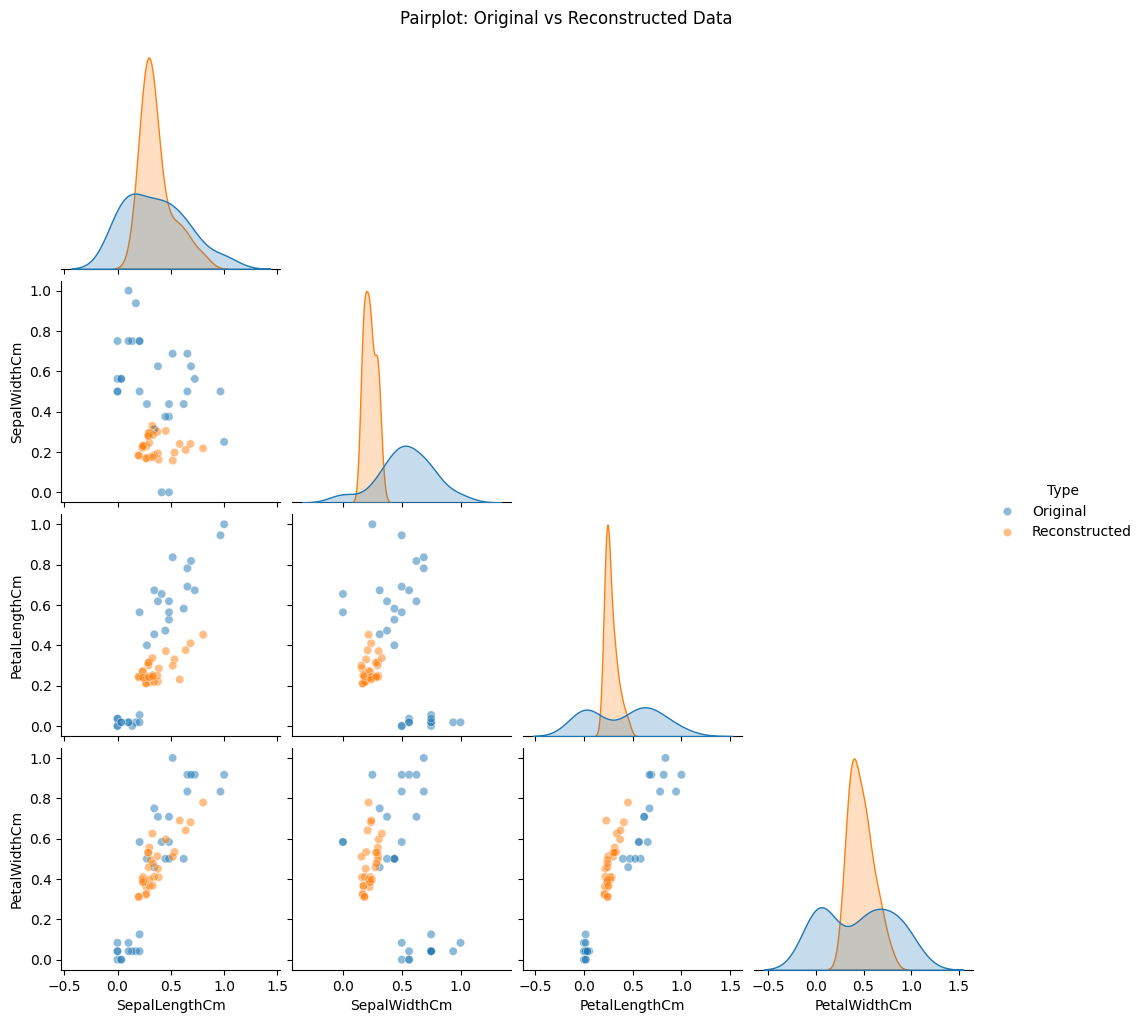

In [55]:
plot_pairplot(X_test, reconstructions, X.columns, X)

Conclusões de análise: 
- O gráfico da perda mostra que o modelo aprendeu com os dados
- O plot do espaço latente não mostra agrupamentos bem definidos mesmo apos estabilização da função de perda.
- Os dados reconstruidos demonstram aproximação aos dados originais, conseguimos verificar que a classe azul está se agrupando para a esquerda, a classe verde para o centro e a classe vermelha esta se deslocando para a direita.

Conclusões de criação:
- A perda sempre precisa ser um valor positivo, se não for, algo está errado na criação do modelo
- O intervalo em que os dados se encontram apos o scaling define qual o calculo da perda possivel, primeiro utilizei o scaling standard e o calculo da perda usando binary crossentropy, a perda estava variando entre positivo e negativo, o modelo aprendia como centralizar os dados reconstruidos, assim basicamente todos os dados tinham valores iguais. Apor correção do scaling para minmax 0 até 1, o problema foi solucionado, a função de perda corrigida permitiu ao modelo aprender e as features dos dados reconstruidos ficaram muito mais condizentes com os dados originais.

# Wine Dataset

In [22]:
df = load_data('../data/processed/processed_wine.csv')

Data loaded successfully.


In [23]:
df = df.drop(columns=['Id'], axis=1)
X = df.drop(columns=['quality'], axis=1)
y = df['quality']
X_train, X_test, y_train, y_test = split_data(X, y)

Data split successfully.


In [24]:
X_train = data_normalize(X_train, method='minmax')
X_test = data_normalize(X_test, method='minmax')

Data normalized successfully.
Data normalized successfully.


In [25]:
input_shape = X_train.shape[1]
latent_dim = 2
topology = [64, 32, 16]

In [26]:
encoder = build_encoder(latent_dim, input_shape, topology)
decoder = build_decoder(latent_dim, input_shape, topology)

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ encoder_input_layer │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │        768 │ encoder_input_la… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      2,080 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 16)        │        528 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean_layer        │ (None, 2)         │         34 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var_layer     │ (None, 2)         │         34 │ dense_8[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling_1          │ (None, 2)         │          0 │ z_mean_layer[0][… │
│ (Sampling)          │                   │            │ z_log_var_layer[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,444 (13.45 KB)

 Trainable params: 3,444 (13.45 KB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ decoder_input_layer             │ (None, 2)              │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder_outputs (Dense)         │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,419 (13.36 KB)

 Trainable params: 3,419 (13.36 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
vae = VAE(encoder, decoder, beta=0.1)

In [28]:
optimizer = optimizer_adam(lr=0.0003)
vae.compile(optimizer=optimizer)

Successfuly created optimizer: Adam with learning rate 0.0003


In [29]:
model_checkpoint = model_checkpoint_callback("./checkpoint.keras")

Model checkpoint callback created.


In [30]:
loss_tracker = LossTracker()

In [31]:
vae.fit(
    X_train, 
    epochs=100, 
    batch_size=32, 
    validation_data=(X_test, None), 
    callbacks=[model_checkpoint, loss_tracker]
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0076 - reconstruction_loss: 3.2749 - total_loss: 3.2756Epoch 1, Loss: 3.1245
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - kl_loss: 0.0077 - reconstruction_loss: 3.2677 - total_loss: 3.2684 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 2/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - kl_loss: 0.0121 - reconstruction_loss: 2.8768 - total_loss: 2.8780Epoch 2, Loss: 2.8070
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - kl_loss: 0.0128 - reconstruction_loss: 2.8476 - total_loss: 2.8489 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00 - val_total_loss: 0.0000e+00
Epoch 3/100
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - kl_loss: 0.0174 - reconstruction_loss: 2.8198 - total_loss: 2.8215Epoch 3, Loss: 2.6449
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - kl_loss: 0.0195 - reconstruction_loss: 2.6579 - total_loss: 2.6599 - val_kl_loss: 0.0000e+00 - val_reconstruction_loss: 0.0000e+00

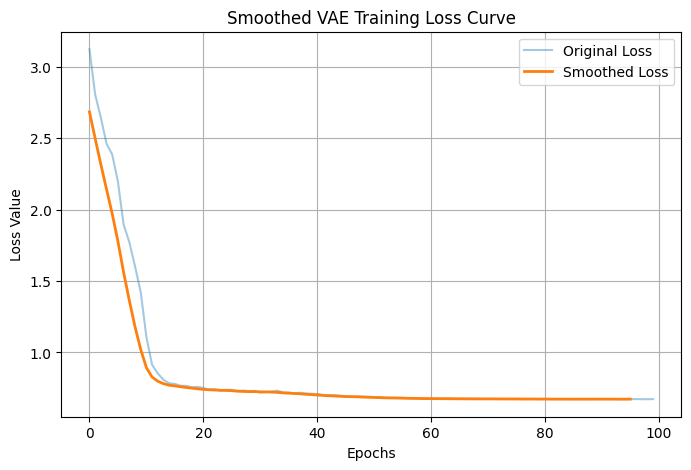

In [32]:
plot_loss(loss_tracker)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


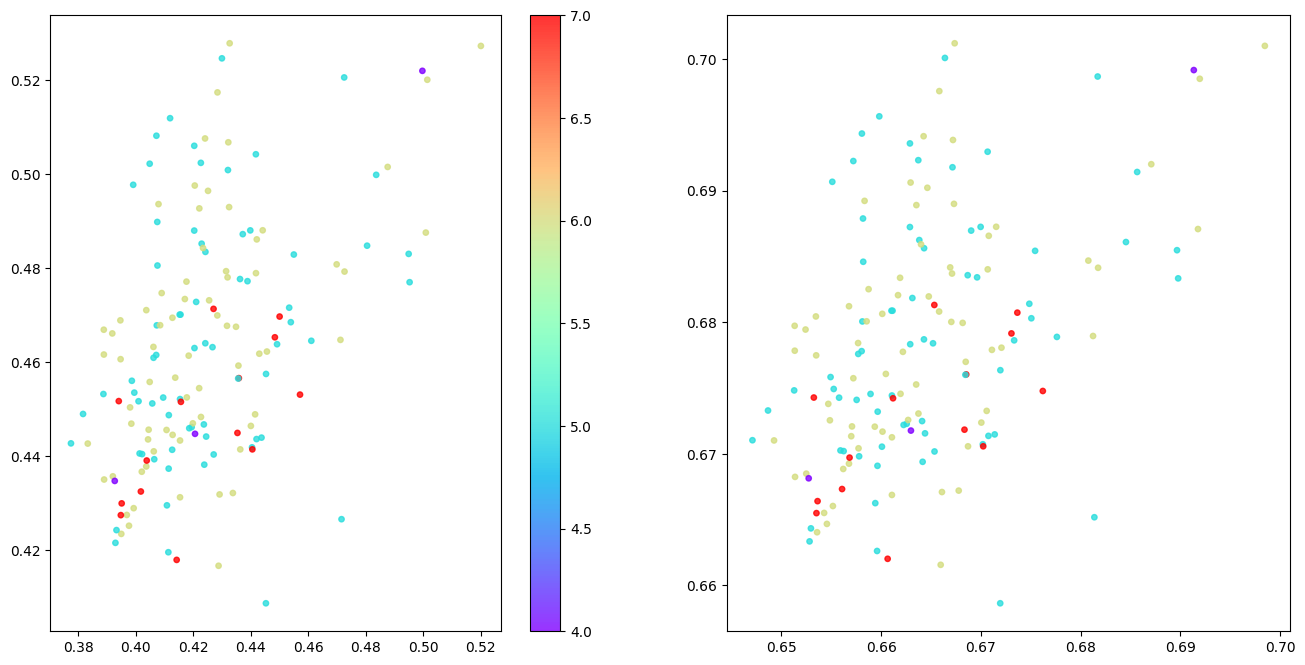

In [33]:
plot_latent_space(vae, X_test, y_test)

In [34]:
z_mean, z_log_var, reconstructions, labels = predict(vae, X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


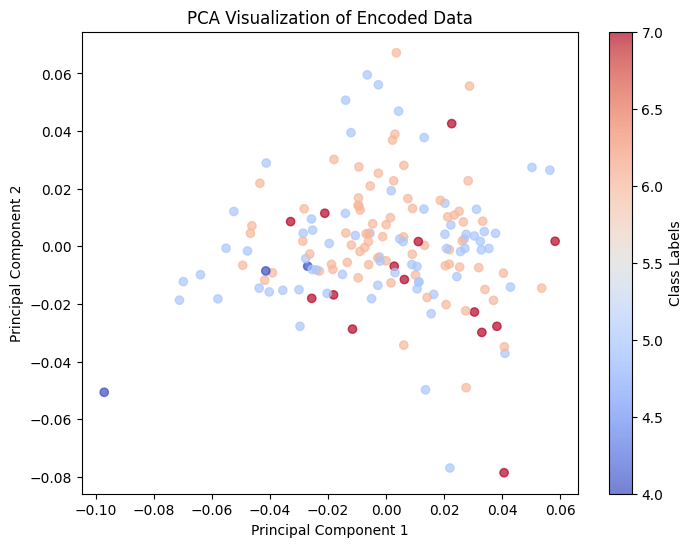

Explained variance ratio: [0.627828   0.37217197]


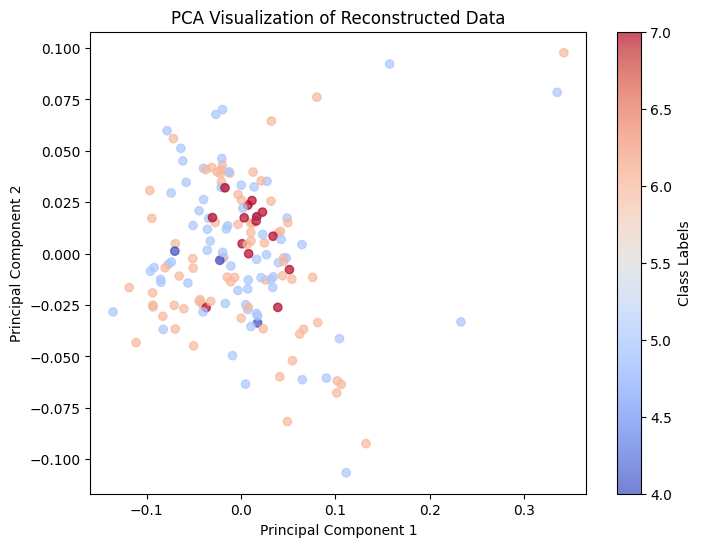

Explained variance ratio: [0.5943125  0.15573479]


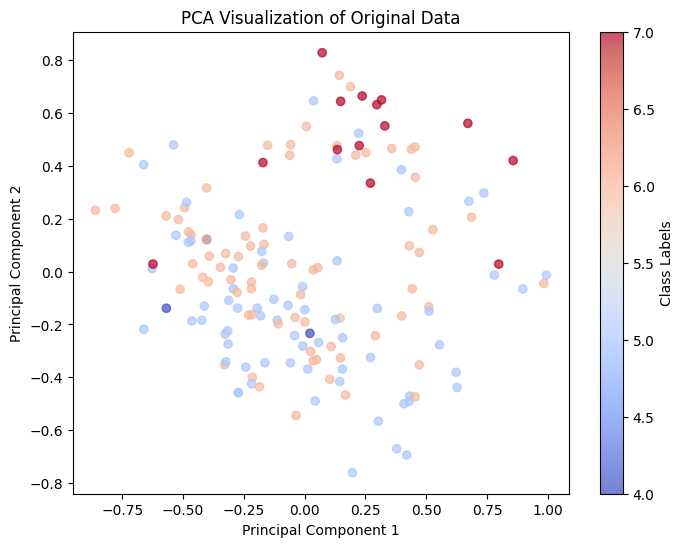

Explained variance ratio: [0.29768399 0.22438903]


In [35]:
plot_reduced_pca(z_mean, labels, name='Encoded')
plot_reduced_pca(reconstructions, labels, name='Reconstructed')
plot_reduced_pca(X_test, labels, name='Original')

In [37]:

removed_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'alcohol']
pairplot_columns = [item for item in X.columns if item not in removed_columns]

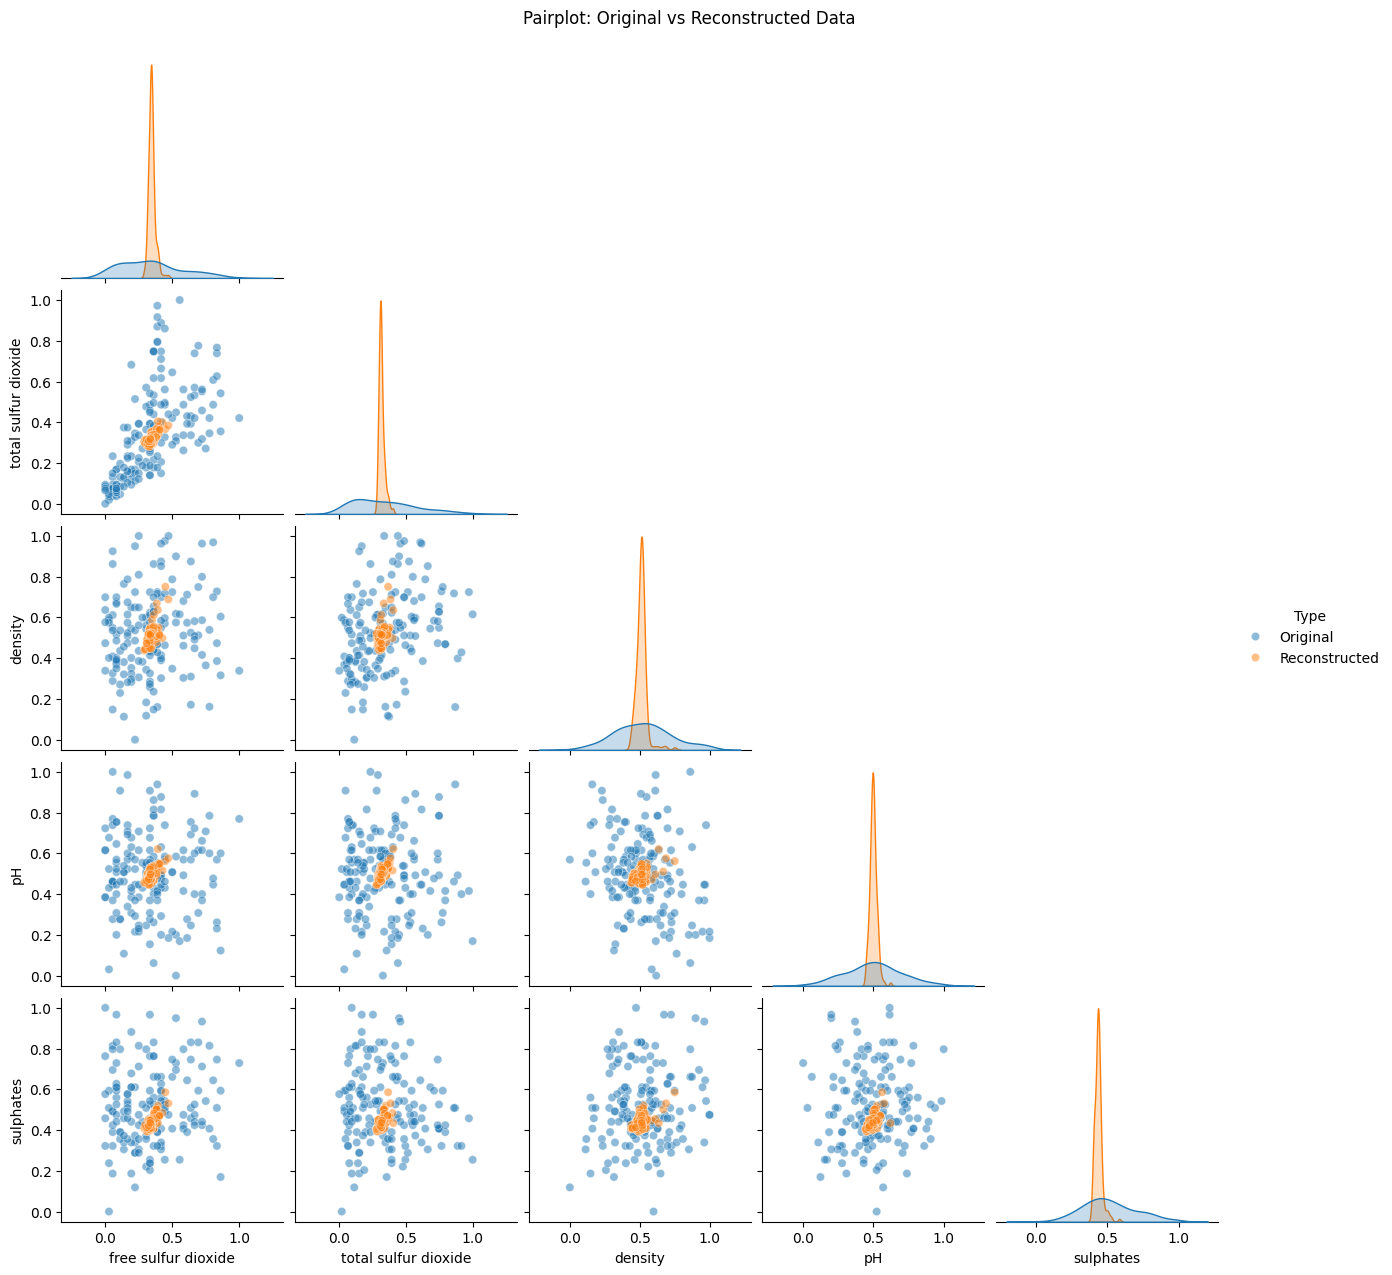

In [38]:
plot_pairplot(X_test, reconstructions, pairplot_columns, X)

Conclusões de Analise:
- O modelo conseguiu extrair padroes para encoding devido a estabilização da perda
- A reconstrução gerou dados centralizados e muito agrupados
- Não ha formação de clusters no espaço latente

Conclusões de criação:
- Usar o pairplot para muitas features é inviavel, assim escolheu-se manter somente 5 features arbitrariamente, porem foi suficiente para entender os resultados.